## 1. Obtain the data

In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [61]:
df = pd.read_csv("hr-data.csv")

In [62]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [63]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## 2. Data Preprocessing

The dataset is super clean. We will label the dataset more approprietly so that it will be in more readable format.

In [64]:
# check if there is any missing values in dataset
df.isnull().any()
# the dataset is super clean

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
Department               False
salary                   False
dtype: bool

### 2.1 labeling
we will make column names more easy to read and consistent in naming style.

In [65]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [66]:
df.rename(columns={
    'number_project': 'project_count',
    'time_spend_company': 'years_at_company',
    'Work_accident': 'work_accident',
    'promotion_last_5years': 'promotion',
    'Department': 'department',
    'left': 'pull_out',
    'average_montly_hours': 'average_monthly_hours'
}, inplace=True)

In [67]:
df.head()

,satisfaction_level,last_evaluation,project_count,average_monthly_hours,years_at_company,work_accident,pull_out,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### 2.2 Feature Conversion
we need to convert categorical features into numeric one.

In [68]:
df.dtypes
# department and salary are categorical features
# we will get unique values from both the columns

satisfaction_level       float64
last_evaluation          float64
project_count              int64
average_monthly_hours      int64
years_at_company           int64
work_accident              int64
pull_out                   int64
promotion                  int64
department                object
salary                    object
dtype: object

In [69]:
df['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [70]:
df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [71]:
df['department'].replace(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], inplace=True)

In [72]:
df['salary'].replace(['low', 'medium', 'high'], [0, 1, 2], inplace=True)

In [73]:
print(df['department'].unique())
print(df['salary'].unique())

[0 1 2 3 4 5 6 7 8 9]
[0 1 2]


In [74]:
df.head()

,satisfaction_level,last_evaluation,project_count,average_monthly_hours,years_at_company,work_accident,pull_out,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,0,0
1,0.80,0.86,5,262,6,0,1,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0


In [75]:
# move the target feature 'left' to the front of the table
pull_out = df['pull_out']
df.drop(columns=['pull_out'], inplace=True)
df.insert(0, 'pull_out', pull_out)

In [76]:
df.head()

,pull_out,satisfaction_level,last_evaluation,project_count,average_monthly_hours,years_at_company,work_accident,promotion,department,salary
0,1,0.38,0.53,2,157,3,0,0,0,0
1,1,0.80,0.86,5,262,6,0,0,0,1
2,1,0.11,0.88,7,272,4,0,0,0,1
3,1,0.72,0.87,5,223,5,0,0,0,0
4,1,0.37,0.52,2,159,3,0,0,0,0


# 3. Exploratory Data Analysis (EDA)

In [77]:
# 1. check the shape of data
df.shape

(14999, 10)

In [78]:
# 2. check the data types of column
df.dtypes

pull_out                   int64
satisfaction_level       float64
last_evaluation          float64
project_count              int64
average_monthly_hours      int64
years_at_company           int64
work_accident              int64
promotion                  int64
department                 int64
salary                     int64
dtype: object

In [79]:
# 3. how many data points of each target class is present
df['pull_out'].value_counts()

0    11428
1     3571
Name: pull_out, dtype: int64

In [80]:
company_leaving_rate = df['pull_out'].value_counts()/14999
company_leaving_rate
# 76% of employees are leaving the company

0    0.761917
1    0.238083
Name: pull_out, dtype: float64

In [81]:
# 4. group by clause according to target classes
pull_out_summary = df.groupby('pull_out')
pull_out_summary.mean()

,satisfaction_level,last_evaluation,project_count,average_monthly_hours,years_at_company,work_accident,promotion,department,salary
pull_out,,,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251,3.408908,0.650945
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321,3.118734,0.414730


## 3.1 summary overview
those who left the company: 
1. were 20% less satisfied.
2. had lower promotion rate.
3. had lower salary.

In [82]:
# 5. statistical overview of all employees
df.describe()

,pull_out,satisfaction_level,last_evaluation,project_count,average_monthly_hours,years_at_company,work_accident,promotion,department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.238083,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268,3.339823,0.594706
std,0.425924,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281,2.820837,0.637183
min,0.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,3.000000,1.000000
75%,0.000000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,6.000000,1.000000
max,1.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,9.000000,2.000000


## 3.2 correlation matrix and heatmap

Text(0.5, 1.0, 'correlation matrix heatmap')

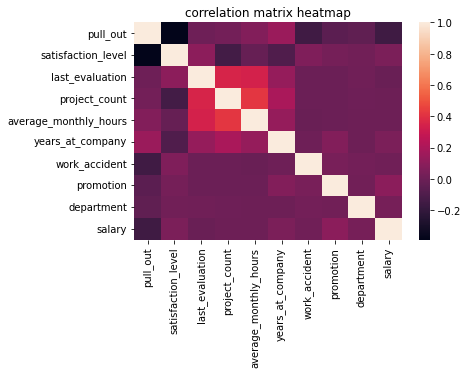

In [83]:
corr = df.corr()
corr = (corr)
sns.heatmap(corr, xticklabels=df.columns.values, yticklabels=df.columns.values)
plt.title("correlation matrix heatmap")

In [84]:
corr

,pull_out,satisfaction_level,last_evaluation,project_count,average_monthly_hours,years_at_company,work_accident,promotion,department,salary
pull_out,1.000000,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,-0.061788,-0.043814,-0.157898
satisfaction_level,-0.388375,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,0.025605,0.015413,0.050022
last_evaluation,0.006567,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,-0.008684,0.011855,-0.013002
project_count,0.023787,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,-0.006064,0.005577,-0.001803
average_monthly_hours,0.071287,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,-0.003544,-0.002387,-0.002242
years_at_company,0.144822,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.067433,-0.001611,0.048715
work_accident,-0.154622,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,0.039245,0.019215,0.009247
promotion,-0.061788,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,1.000000,0.015170,0.098119
department,-0.043814,0.015413,0.011855,0.005577,-0.002387,-0.001611,0.019215,0.015170,1.000000,0.033415
salary,-0.157898,0.050022,-0.013002,-0.001803,-0.002242,0.048715,0.009247,0.098119,0.033415,1.000000


following are strong correlated features:
1. (-) pull_out, satisfaction level, salary.
2. (+) project_count, last_evaluation, average_monthly_hours

## 3.3 Advance data exploration
visualising relationship between features
- visualising relationship between continuous features
- visualising relationship between categorical features

### 3.3.1. department vs pull_out

In [85]:
dept_pull_out_cross_tab = pd.crosstab(df['department'], df['pull_out'])
dept_pull_out_cross_tab

pull_out,0,1
department,,
0,3126,1014
1,563,204
2,524,215
3,2023,697
4,1674,555
5,539,91
6,954,273
7,704,198
8,655,203


<AxesSubplot:xlabel='department'>

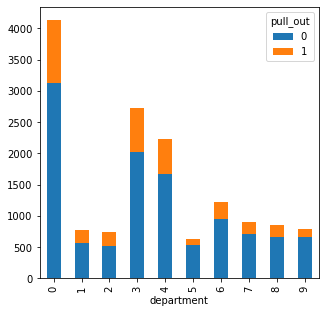

In [86]:
dept_pull_out_cross_tab.plot(kind="bar", stacked=True, figsize=(5,5))

observations:
   1. employees from sales,technical and support leave the job more.
   2. management people has least pull_out rate. that means people which are at higher positions in management tend to not leave.

### 3.3.2. department vs salary

In [87]:
dept_salary_cross_tab = pd.crosstab(df['department'], df['salary'])
dept_salary_cross_tab

salary,0,1,2
department,,,
0,2099,1772,269
1,358,335,74
2,335,359,45
3,1372,1147,201
4,1146,942,141
5,180,225,225
6,609,535,83
7,451,383,68
8,402,376,80


<AxesSubplot:xlabel='department'>

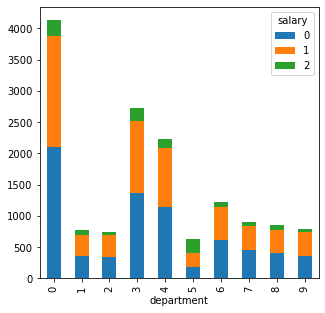

In [88]:
dept_salary_cross_tab.plot(kind="bar", stacked=True, figsize=(5,5))

### 3.3.3 pull_out vs salary

In [89]:
pull_out_salary_cross_tab = pd.crosstab(df['salary'], df['pull_out'])
pull_out_salary_cross_tab

pull_out,0,1
salary,,
0,5144,2172
1,5129,1317
2,1155,82


<AxesSubplot:xlabel='salary'>

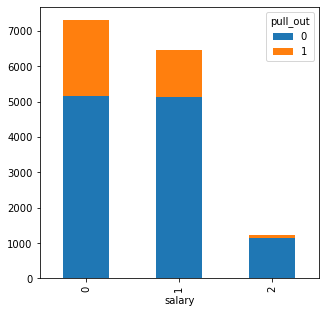

In [90]:
pull_out_salary_cross_tab.plot(kind="bar", stacked=True, figsize=(5,5))

All the employees who left the job used to get low-medium salary. Very few people with high salary have left the job.

### 3.3.4 pull out vs promotion

In [91]:
pull_out_promotion_crosstab = pd.crosstab(df['promotion'], df['pull_out'])
pull_out_promotion_crosstab

pull_out,0,1
promotion,,
0,11128,3552
1,300,19


<AxesSubplot:xlabel='promotion'>

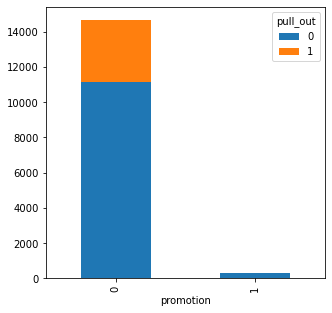

In [92]:
pull_out_promotion_crosstab.plot(kind="bar", stacked=True, figsize=(5,5))

most of all employees who didn't get promotion left the company.

### 3.3.5 years_at_company vs pull_out

In [93]:
df['years_at_company'].unique()

array([ 3,  6,  4,  5,  2,  8, 10,  7])

In [94]:
pull_out_years_at_company_crosstab = pd.crosstab(df['years_at_company'], df['pull_out'])
pull_out_years_at_company_crosstab

pull_out,0,1
years_at_company,,
2,3191,53
3,4857,1586
4,1667,890
5,640,833
6,509,209
7,188,0
8,162,0
10,214,0


<AxesSubplot:xlabel='years_at_company'>

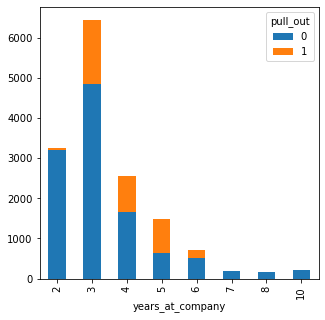

In [95]:
pull_out_years_at_company_crosstab.plot(kind="bar", stacked=True, figsize=(5,5))

- bulk of employees worked for 3-6 years before leaving. 
- most employees left the company after 3 years of experience.

Text(0.5, 0, 'years of experience')

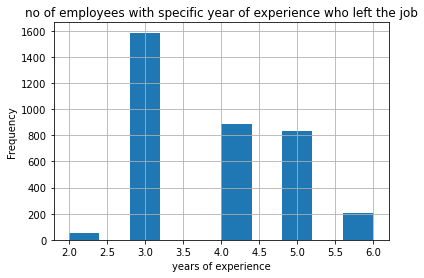

In [96]:
df.loc[(df['pull_out']==1), 'years_at_company'].plot(kind="hist", bins=10, grid=True)
plt.title("no of employees with specific year of experience who left the job")
plt.xlabel("years of experience")

### 3.3.6 project_count vs pull_out

In [97]:
df['project_count'].unique()

array([2, 5, 7, 6, 4, 3])

In [98]:
project_count_pull_out_crosstab = pd.crosstab(df['project_count'], df['pull_out'])
project_count_pull_out_crosstab

pull_out,0,1
project_count,,
2,821,1567
3,3983,72
4,3956,409
5,2149,612
6,519,655
7,0,256


<AxesSubplot:xlabel='project_count'>

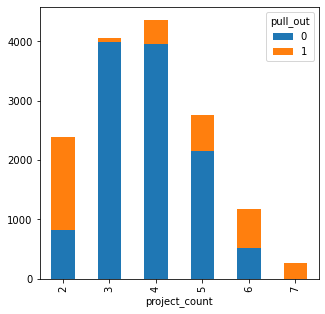

In [99]:
project_count_pull_out_crosstab.plot(kind="bar", stacked=True, figsize=(5,5))

1. more than half of employees who left the job were working on two projects.
2. project_count = 3 is sweet spot. 
3. Also, more no. of employees who were working on 6 or 6+ projects left the job. This may be because of overload.

Text(0.5, 0, 'project count')

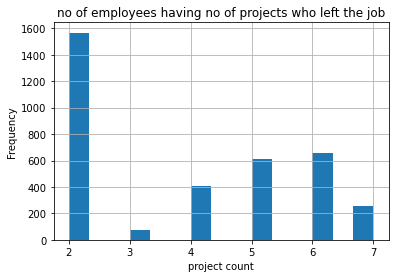

In [100]:
df.loc[df['pull_out'] == 1, 'project_count'].plot(kind="hist", bins=15, grid=True)
plt.title("no of employees having no of projects who left the job")
plt.xlabel("project count")

### 3.3.7 last_evaluation vs pull_out

In [101]:
# get the unique values of last_evaluation
df['last_evaluation'].unique()

array([0.53, 0.86, 0.88, 0.87, 0.52, 0.5 , 0.77, 0.85, 1.  , 0.54, 0.81,
       0.92, 0.55, 0.56, 0.47, 0.99, 0.51, 0.89, 0.83, 0.95, 0.57, 0.49,
       0.46, 0.62, 0.94, 0.48, 0.8 , 0.74, 0.7 , 0.78, 0.91, 0.93, 0.98,
       0.97, 0.79, 0.59, 0.84, 0.45, 0.96, 0.68, 0.82, 0.9 , 0.71, 0.6 ,
       0.65, 0.58, 0.72, 0.67, 0.75, 0.73, 0.63, 0.61, 0.76, 0.66, 0.69,
       0.37, 0.64, 0.39, 0.41, 0.43, 0.44, 0.36, 0.38, 0.4 , 0.42])

In [102]:
print("max evaluation : ", df['last_evaluation'].max())
print("min evaluation : ", df['last_evaluation'].min())

max evaluation :  1.0
min evaluation :  0.36


In [103]:
# No employee from the company left even though last evaluation is minimum.
df.loc[(df['last_evaluation'] == 0.36), 'pull_out']

2236     0
3436     0
3501     0
3579     0
4058     0
4979     0
5149     0
5630     0
6544     0
6569     0
6737     0
7400     0
7638     0
8065     0
8980     0
10430    0
11119    0
11168    0
11500    0
13330    0
13379    0
13711    0
Name: pull_out, dtype: int64

Text(0.5, 0, 'last evaluation')

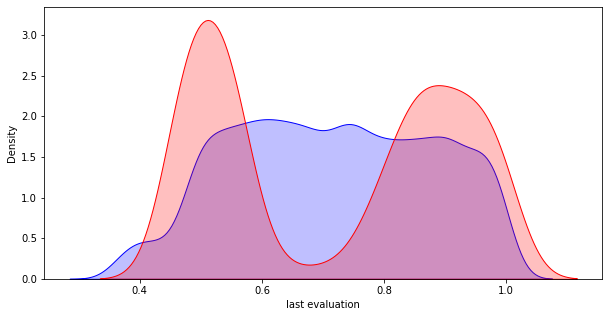

In [104]:
plt.figure(figsize=(10, 5))
ax=sns.kdeplot(df.loc[(df['pull_out'] == 0), 'last_evaluation'], color='b', shade=True, label="no pull_out")
ax=sns.kdeplot(df.loc[(df['pull_out'] == 1), 'last_evaluation'], color='r', shade=True, label="pull_out")
plt.xlabel("last evaluation")

### 3.3.8 pull_out vs avarage_monthly_hours

In [105]:
df['average_monthly_hours'].unique()
# lot of continuous values

array([157, 262, 272, 223, 159, 153, 247, 259, 224, 142, 135, 305, 234,
       148, 137, 143, 160, 255, 282, 147, 304, 139, 158, 242, 239, 128,
       132, 294, 134, 145, 140, 246, 126, 306, 152, 269, 127, 281, 276,
       182, 273, 307, 309, 225, 226, 308, 244, 286, 161, 264, 277, 275,
       149, 295, 151, 249, 291, 232, 130, 129, 155, 265, 279, 284, 221,
       154, 150, 267, 257, 177, 144, 289, 258, 263, 251, 133, 216, 300,
       138, 260, 183, 250, 292, 283, 245, 256, 278, 240, 136, 301, 243,
       296, 274, 164, 146, 261, 285, 141, 297, 156, 287, 219, 254, 228,
       131, 252, 236, 270, 298, 192, 248, 266, 238, 229, 233, 268, 231,
       253, 302, 271, 290, 235, 293, 241, 218, 199, 180, 195, 237, 227,
       172, 206, 181, 217, 310, 214, 198, 211, 222, 213, 202, 184, 204,
       288, 220, 299, 303, 212, 196, 179, 205, 230, 203, 280, 169, 188,
       178, 175, 166, 163, 168, 165, 189, 162, 215, 193, 176, 191, 174,
       201, 208, 171, 111, 104, 106, 100, 194, 209, 185, 200, 20

Text(0.5, 0, 'avarage monthly hours')

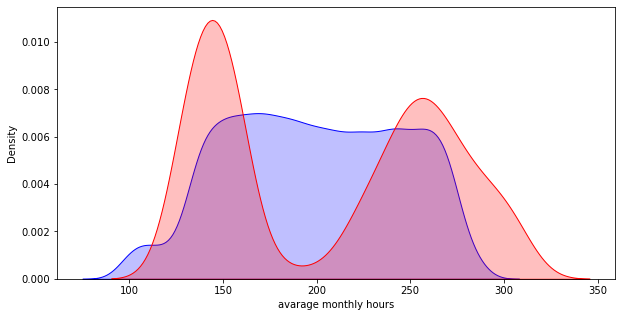

In [106]:
plt.figure(figsize=(10, 5))
ax = sns.kdeplot(df.loc[(df['pull_out'] == 0), 'average_monthly_hours'], color="b", shade=True, label="no pull_out")
ax = sns.kdeplot(df.loc[(df['pull_out'] == 1), 'average_monthly_hours'], color="r", shade=True, label="pull_out")
plt.xlabel("avarage monthly hours")

- bimodal distribution distribution for employees that turnovered.
- it looks like employees who worked less than 150 hours or more than 250 hours monthly, left the company. i.e. those employees were either underworked or overworked.

### 3.3.9 project_count vs avarage_monthly_hours

In [107]:
df['project_count'].unique()

array([2, 5, 7, 6, 4, 3])

In [108]:
df['average_monthly_hours'].unique()

array([157, 262, 272, 223, 159, 153, 247, 259, 224, 142, 135, 305, 234,
       148, 137, 143, 160, 255, 282, 147, 304, 139, 158, 242, 239, 128,
       132, 294, 134, 145, 140, 246, 126, 306, 152, 269, 127, 281, 276,
       182, 273, 307, 309, 225, 226, 308, 244, 286, 161, 264, 277, 275,
       149, 295, 151, 249, 291, 232, 130, 129, 155, 265, 279, 284, 221,
       154, 150, 267, 257, 177, 144, 289, 258, 263, 251, 133, 216, 300,
       138, 260, 183, 250, 292, 283, 245, 256, 278, 240, 136, 301, 243,
       296, 274, 164, 146, 261, 285, 141, 297, 156, 287, 219, 254, 228,
       131, 252, 236, 270, 298, 192, 248, 266, 238, 229, 233, 268, 231,
       253, 302, 271, 290, 235, 293, 241, 218, 199, 180, 195, 237, 227,
       172, 206, 181, 217, 310, 214, 198, 211, 222, 213, 202, 184, 204,
       288, 220, 299, 303, 212, 196, 179, 205, 230, 203, 280, 169, 188,
       178, 175, 166, 163, 168, 165, 189, 162, 215, 193, 176, 191, 174,
       201, 208, 171, 111, 104, 106, 100, 194, 209, 185, 200, 20

In [109]:
df.dtypes

pull_out                   int64
satisfaction_level       float64
last_evaluation          float64
project_count              int64
average_monthly_hours      int64
years_at_company           int64
work_accident              int64
promotion                  int64
department                 int64
salary                     int64
dtype: object

<AxesSubplot:xlabel='project_count', ylabel='average_monthly_hours'>

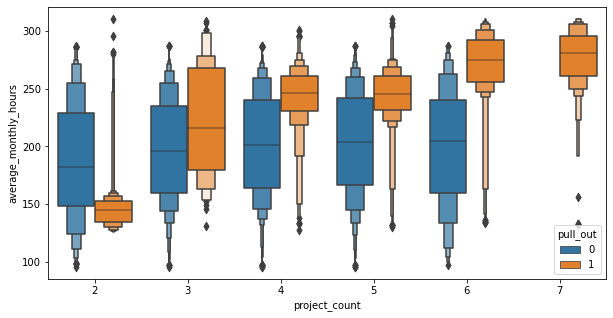

In [110]:
plt.figure(figsize=(10, 5))
sns.boxenplot(data=df, x="project_count", y="average_monthly_hours", hue="pull_out")

key observations:
- employees who didn't left the job have consistent working hours irrespetive of number of projects they're working on.
- employees who left the job have little but incosistent working hours depending on the project count. As project count is increasing, the average monthly hours also increases.
- average no of employees who stayed in the company worked for 200 hrs/month.
- average no of employees who left the company worked for 200 hrs - 280 hours.

some questions:
- what is meaning of this? probably we need to add more domain knowledge related to company.
- What is the reason behind - employee who left the company worked more hours than employee who didn't even though both have same project count?

### 3.3.10 project_count vs last_evaluation

In [111]:
df['last_evaluation'].unique()

array([0.53, 0.86, 0.88, 0.87, 0.52, 0.5 , 0.77, 0.85, 1.  , 0.54, 0.81,
       0.92, 0.55, 0.56, 0.47, 0.99, 0.51, 0.89, 0.83, 0.95, 0.57, 0.49,
       0.46, 0.62, 0.94, 0.48, 0.8 , 0.74, 0.7 , 0.78, 0.91, 0.93, 0.98,
       0.97, 0.79, 0.59, 0.84, 0.45, 0.96, 0.68, 0.82, 0.9 , 0.71, 0.6 ,
       0.65, 0.58, 0.72, 0.67, 0.75, 0.73, 0.63, 0.61, 0.76, 0.66, 0.69,
       0.37, 0.64, 0.39, 0.41, 0.43, 0.44, 0.36, 0.38, 0.4 , 0.42])

<AxesSubplot:xlabel='project_count', ylabel='last_evaluation'>

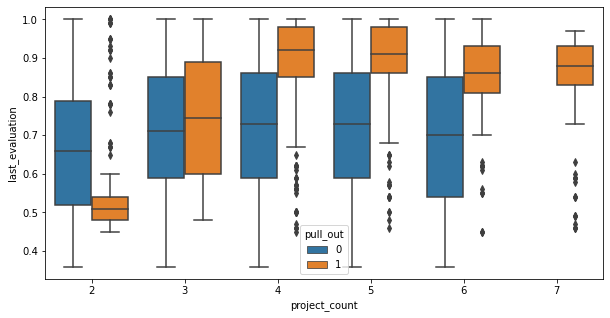

In [112]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="project_count", y="last_evaluation", hue="pull_out")

key observations:
- employees who stayed in the company have got consistent evaluation even though project count is increased.
- employees who left the company have got varying evaluation. As no of projects are increasing their evaluation is also increasing. 
- there is large group of employees who left the job - having 3 projects and average rating ~ 75%.
- even with different project count, the average evaluation of every employee is above 70%.
- employee that had 2 projects and horrible evaluation left.

some questions:
- what is the reason behind - employees who who left the job, had on average, a higher evaluation than employees who didn't leave. May be we should check their salary. Because one reason may be they thought they should switch company for higher salary, less stress, etc. We should examine that.

### 3.3.11 project_count vs last_evaluation vs satisfaction

In [113]:
df['satisfaction_level'].unique()

array([0.38, 0.8 , 0.11, 0.72, 0.37, 0.41, 0.1 , 0.92, 0.89, 0.42, 0.45,
       0.84, 0.36, 0.78, 0.76, 0.09, 0.46, 0.4 , 0.82, 0.87, 0.57, 0.43,
       0.13, 0.44, 0.39, 0.85, 0.81, 0.9 , 0.74, 0.79, 0.17, 0.24, 0.91,
       0.71, 0.86, 0.14, 0.75, 0.7 , 0.31, 0.73, 0.83, 0.32, 0.54, 0.27,
       0.77, 0.88, 0.48, 0.19, 0.6 , 0.12, 0.61, 0.33, 0.56, 0.47, 0.28,
       0.55, 0.53, 0.59, 0.66, 0.25, 0.34, 0.58, 0.51, 0.35, 0.64, 0.5 ,
       0.23, 0.15, 0.49, 0.3 , 0.63, 0.21, 0.62, 0.29, 0.2 , 0.16, 0.65,
       0.68, 0.67, 0.22, 0.26, 0.99, 0.98, 1.  , 0.52, 0.93, 0.97, 0.69,
       0.94, 0.96, 0.18, 0.95])

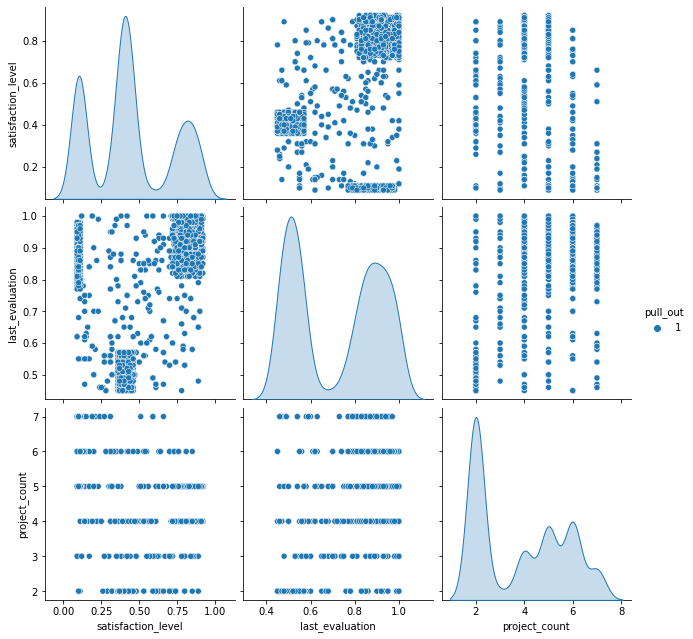

In [114]:
sns.pairplot(data=df[df['pull_out'] == 1], hue="pull_out", vars=['satisfaction_level', 'last_evaluation', 'project_count'], height=3)

key observations:
- For last_evaluation vs safisfaction plot, there are three different clusters.


For cluster 1 : 
- these people have rating satisfaction level<25% which is very less, but have evaluation>75%. These may imply that these employee are may be good workers but feeling horrible at job. 
- some questions:
  * what could be the reason for feeling horrible if they're highly evaluated?
  * could it be working too hard?
  * could this cluster mean employee who are over worked?
  
For cluster 2 :
- satisfaction level is between 35%-45% and also evaluation is less than 58%.
- these could be employees who felt bad at the company and very badly evaluated.
- are these employees under-performed?

For cluster 3 : 
- satisfaction level is very hight, more than 70% and evaluations are also good, 80%-100%. These are the employees who are ideal for these company. They loved their work and they are evaluated highly. May be employees in this category left because they found better job opportunity.

In [118]:
# we will save the processed data into csv file. 
# we will use this data for modelling machine learning algorithms.
# df.to_csv("processed-data.csv", sep=",", index=False)